## About 
Preventing heart disease is important. Good data-driven systems for predicting heart disease can improve the entire research and prevention process, making sure that more people can live healthy lives.


### Problem Statement
Goal is to predict the binary class heart_disease_present, which represents whether or not a patient has heart disease:
1. 0 represents no heart disease present
2. 1 represents heart disease present


## Work Flow
1. Heart Data
2. Data Pre Processing
3. Train Test Spliting
4. Feed Data into Machine Learning Model
5. Feed New Data To The Model Predict Wheather Person Healthy or Heart Defect

### IMPORTING THE DEPENDENCIES

In [1]:
import numpy as np #for arrays
import pandas as pd  # for creating dataframe(structured tables)
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split #split the data into train and test 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score #Evaluate our model how it is performing

### Data Collection And Processing

In [2]:
# Loading the csv to Pandas DataFrame
data1 = pd.read_csv('labels_heart.csv')
data1.head()

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


In [3]:
data2 = pd.read_csv('values_heart.csv')
data2.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [4]:
# add both datasets together
heart_data =pd.merge(data1,data2, on = 'patient_id',how='right')

In [5]:
#Print 1st Five Rows
heart_data.head()

,patient_id,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,0,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,0,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [6]:
#Print last Five Rows Tail part
heart_data.tail()

,patient_id,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
175,5qfar3,1,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,2s2b1f,1,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,nsd00i,1,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0xw93k,0,1,normal,124,3,2,1,0,255,0.0,1,48,175,0
179,2nx10r,0,1,normal,160,3,1,0,0,201,0.0,0,54,163,0


In [7]:
data1.shape

(180, 2)

In [8]:
data2.shape

(180, 14)

In [9]:
# number of rows and columns in the datraset
heart_data.shape

(180, 15)

In [10]:
#getting some info about the data
heart_data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   heart_disease_present                 180 non-null    int64  
 2   slope_of_peak_exercise_st_segment     180 non-null    int64  
 3   thal                                  180 non-null    object 
 4   resting_blood_pressure                180 non-null    int64  
 5   chest_pain_type                       180 non-null    int64  
 6   num_major_vessels                     180 non-null    int64  
 7   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 8   resting_ekg_results                   180 non-null    int64  
 9   serum_cholesterol_mg_per_dl           180 non-null    int64  
 10  oldpeak_eq_st_depression              180 non-null    float64
 11  sex                

In [11]:
#checking for missing values
heart_data.isnull().sum()

patient_id                              0
heart_disease_present                   0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
dtype: int64

<AxesSubplot:>

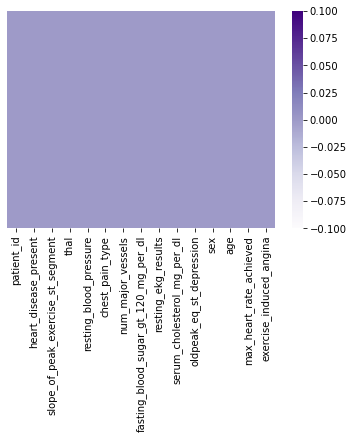

In [12]:
#we can find missing values by using seaborn heatmap
sns.heatmap(heart_data.isnull(), yticklabels = False, cbar=True, cmap='Purples')

In [13]:
#we can identify missing values by using listcomprehensive method
missing_values = [features for features in heart_data.columns if heart_data[features].isnull().sum()>0]

In [14]:
missing_values

[]

In [15]:
#statistical measure about the data
heart_data.describe()

,heart_disease_present,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,0.444444,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667
std,0.498290,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474
min,0.000000,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000
25%,0.000000,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000
50%,0.000000,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000
75%,1.000000,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000
max,1.000000,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000


Describe:Provides us statistical information in the numerical form. we can infer that in the age column the min age is 29yrs and max 77yrs mean of the age is 54yrs. The quartel details are given in the form of 25%,50% and 75%.The data is divided into 3 quartiles or 4 equal parts. So 25% values lie in each group. Standard deviation and mean are statistical measurements which give us an indea of the central tendency of the dataset however mean is sensitive to outliers and hence we need more information to make accurate decisions.

In [16]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   heart_disease_present                 180 non-null    int64  
 2   slope_of_peak_exercise_st_segment     180 non-null    int64  
 3   thal                                  180 non-null    object 
 4   resting_blood_pressure                180 non-null    int64  
 5   chest_pain_type                       180 non-null    int64  
 6   num_major_vessels                     180 non-null    int64  
 7   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 8   resting_ekg_results                   180 non-null    int64  
 9   serum_cholesterol_mg_per_dl           180 non-null    int64  
 10  oldpeak_eq_st_depression              180 non-null    float64
 11  sex                

### Checking Categorical Features

In [17]:
#checking categorical feartures
cat_feat = [features for features in heart_data.columns if heart_data[features].dtypes=='O']

In [18]:
cat_feat

['patient_id', 'thal']

In [19]:
#drop patient_id
heart_data.drop('patient_id',axis=1,inplace=True)

In [20]:
heart_data['thal'].value_counts()

normal               98
reversible_defect    74
fixed_defect          8
Name: thal, dtype: int64

### Handling Categorical Features

In [21]:
#Handling catagorical feature
heart_data['thal'] = heart_data['thal'].map({'normal':1,'reversible_defect':2,'fixed_defect':3})

In [22]:
heart_data['thal'].value_counts()

1    98
2    74
3     8
Name: thal, dtype: int64

In [23]:
cat_feat

['patient_id', 'thal']

In [24]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   heart_disease_present                 180 non-null    int64  
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    int64  
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

we notice that the dataset has no null values.

In [25]:
## Checking the distribution of heart_diseas_present
#1 Represent defective heart
#0 Represent non healthy heart
heart_data['heart_disease_present'].value_counts()

0    100
1     80
Name: heart_disease_present, dtype: int64

### Finding The Correlation Among The Attributes

<AxesSubplot:>

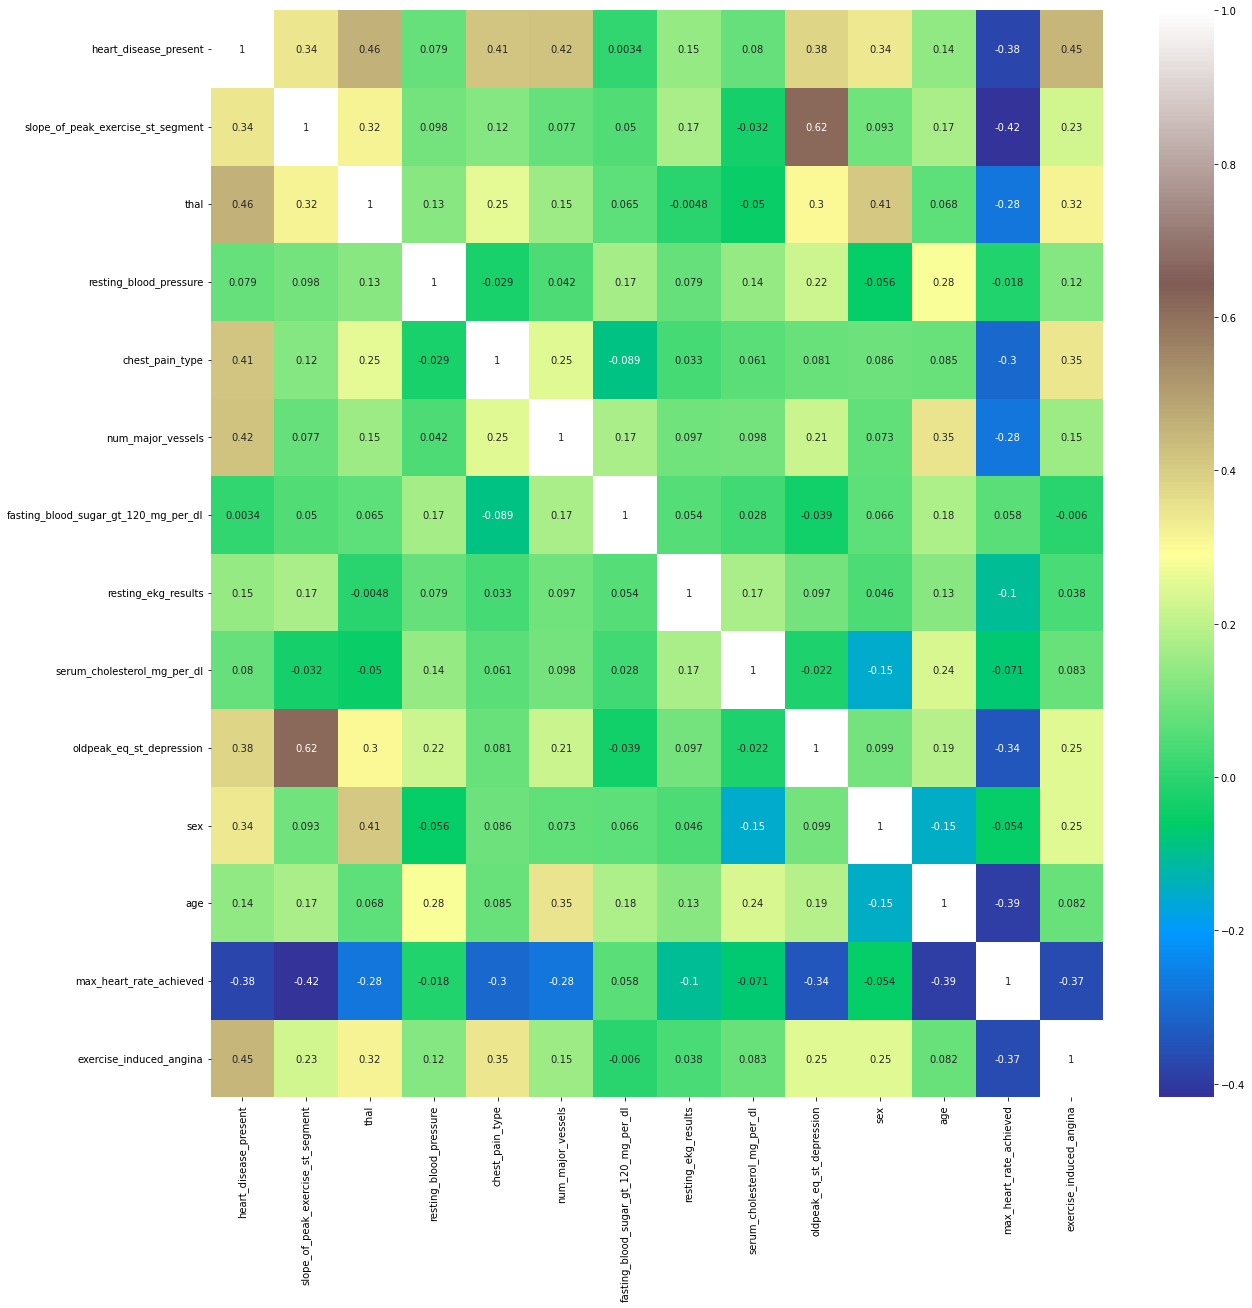

In [27]:
plt.figure(figsize=(20,20))
sns.heatmap(heart_data.corr() , annot=True, cmap='terrain')

we can observe positive correlation between heart_disease_present and slope_of_peak,thal,chest_pain,
num_major_vessels,oldpeak_eq_st_dep,sex,excercise_induced
and negative correlation between heart_disease and max_heart_rate_achived

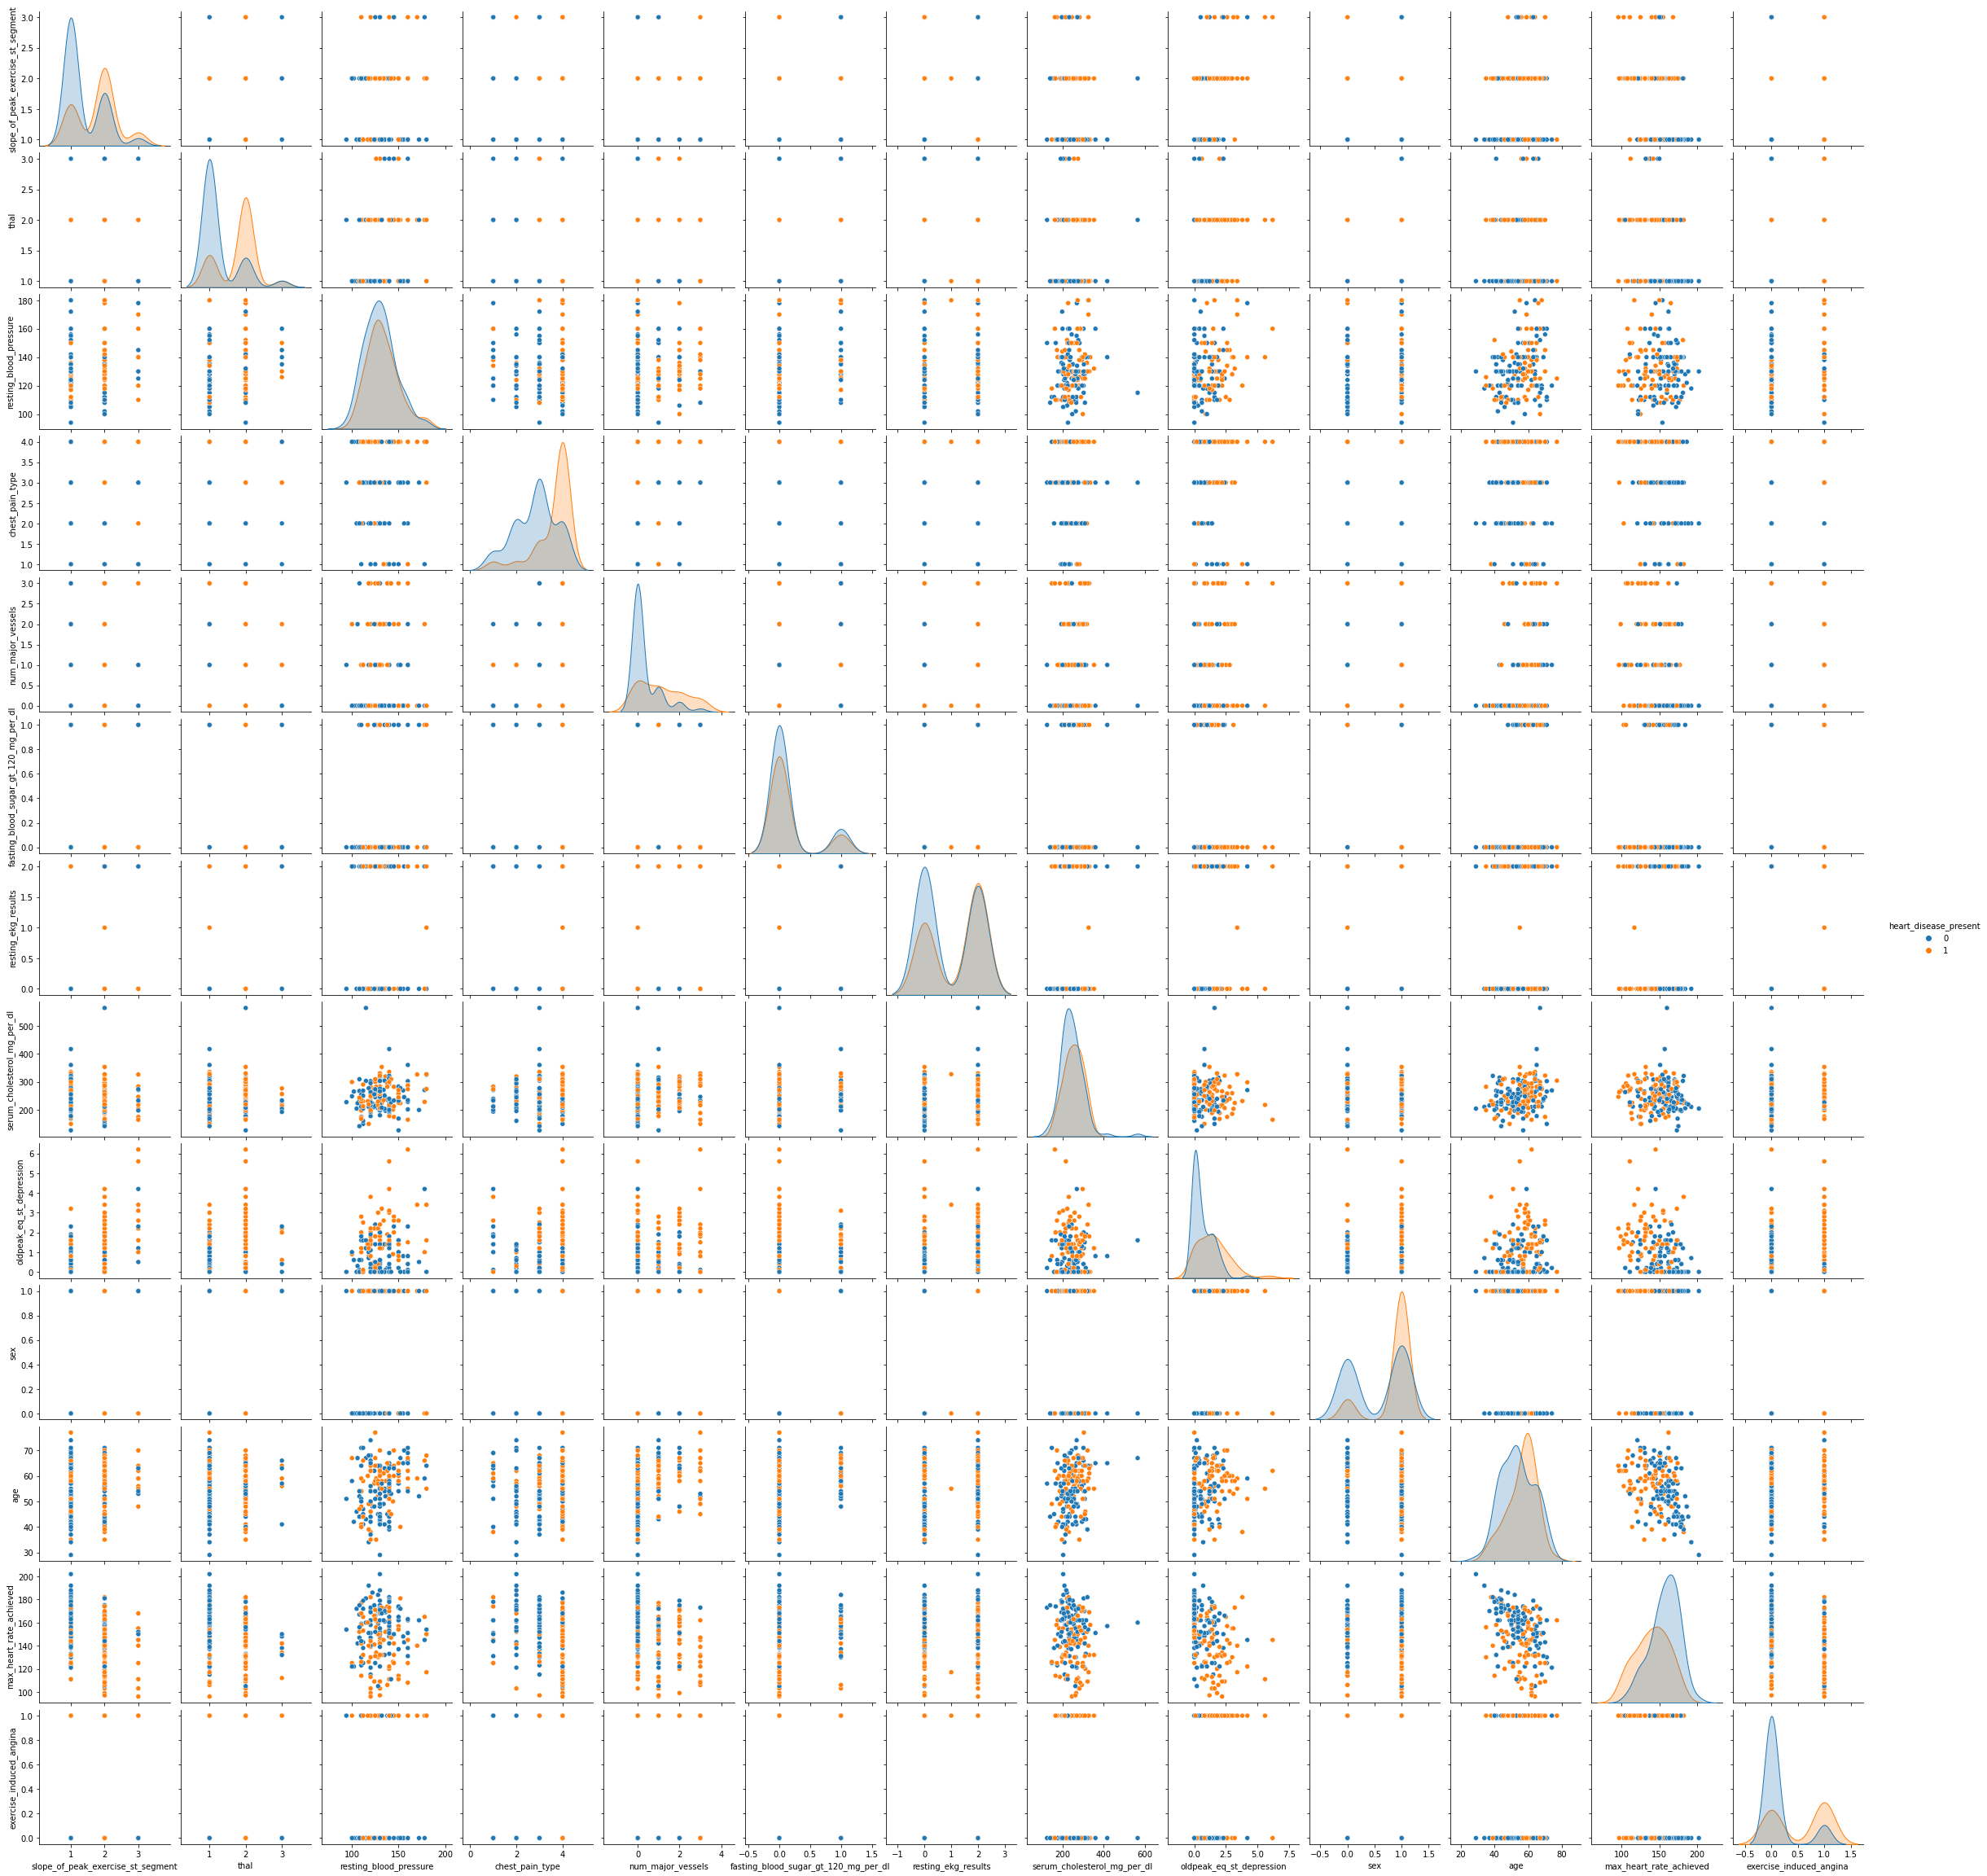

In [29]:
import seaborn as sns
sns.pairplot(heart_data, hue='heart_disease_present')

array([[<AxesSubplot:title={'center':'heart_disease_present'}>,
        <AxesSubplot:title={'center':'slope_of_peak_exercise_st_segment'}>,
        <AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'resting_blood_pressure'}>],
       [<AxesSubplot:title={'center':'chest_pain_type'}>,
        <AxesSubplot:title={'center':'num_major_vessels'}>,
        <AxesSubplot:title={'center':'fasting_blood_sugar_gt_120_mg_per_dl'}>,
        <AxesSubplot:title={'center':'resting_ekg_results'}>],
       [<AxesSubplot:title={'center':'serum_cholesterol_mg_per_dl'}>,
        <AxesSubplot:title={'center':'oldpeak_eq_st_depression'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'max_heart_rate_achieved'}>,
        <AxesSubplot:title={'center':'exercise_induced_angina'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

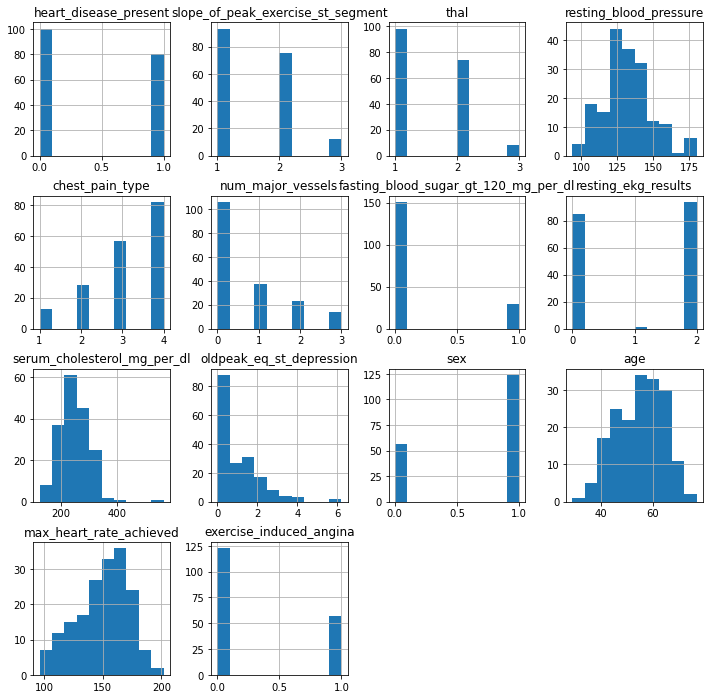

In [30]:
heart_data.hist(figsize=(12,12),layout=(4,4))

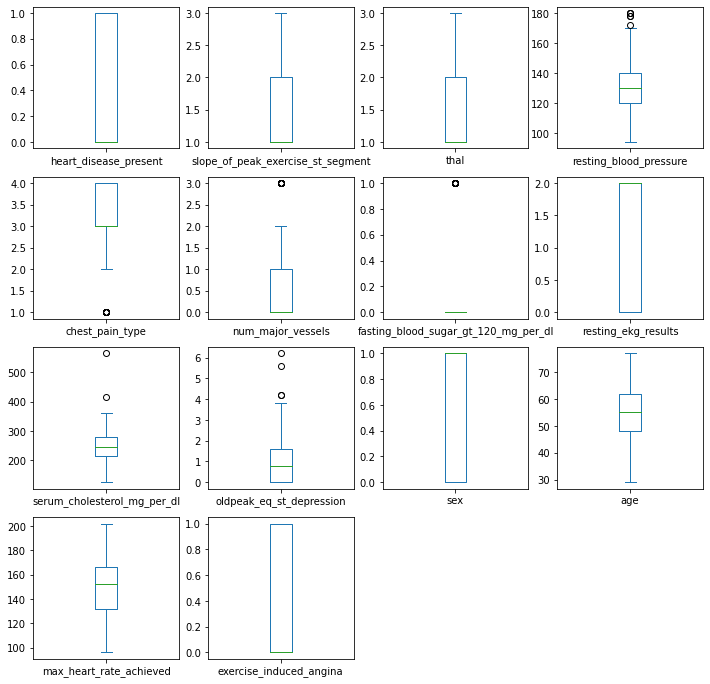

In [84]:
#box and whiskers plot
heart_data.plot(kind='box', subplots = True, layout=(4,4),figsize=(12,12))
plt.show()

#### Individual Plotting And Understand The Relationship

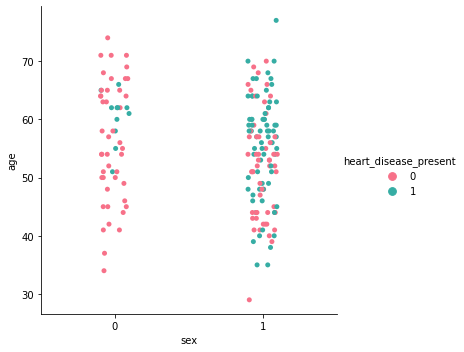

In [87]:
sns.catplot(data=heart_data,x='sex', y='age',hue='heart_disease_present',palette='husl')
#  0 represents no heart disease present
#  1 represents heart disease present
#  sex (type: binary): 0: female, 1: male

<AxesSubplot:xlabel='sex', ylabel='serum_cholesterol_mg_per_dl'>

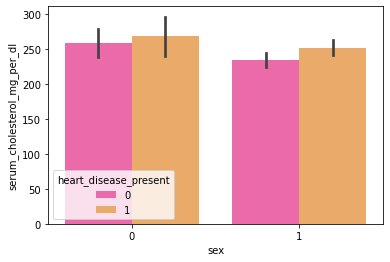

In [88]:
# serum_cholesterol_mg_per_dl (type: int): serum cholestoral in mg/dl
sns.barplot(data=heart_data,x='sex',y='serum_cholesterol_mg_per_dl',hue='heart_disease_present',palette='spring')

In [90]:
heart_data['sex'].value_counts()
#124--males
#56--females

1    124
0     56
Name: sex, dtype: int64

In [92]:
heart_data['heart_disease_present'].value_counts()
#80--heart_disease_cases (included f and m)
#100-healthy_cases(female and male)

0    100
1     80
Name: heart_disease_present, dtype: int64

In [93]:
heart_data['thal'].value_counts()
#•thal: results of thallium stress test measuring blood flow to the heart
#with possible values normal, fixed_defect, reversible_defect

1    98
2    74
3     8
Name: thal, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

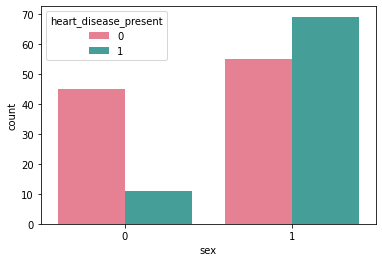

In [95]:
sns.countplot(data=heart_data,x='sex',hue='heart_disease_present',palette='husl')

Here 1 means male and 0 means female we can observe female having heart_diseases less comparatively men. Males have high heart_diseases as compared to female in this dataset

<AxesSubplot:xlabel='heart_disease_present', ylabel='count'>

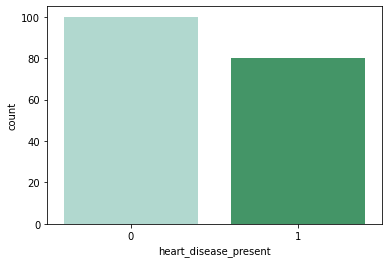

In [97]:
sns.countplot(data=heart_data,palette='BuGn',x='heart_disease_present')

We observe the count for not having heart_disease and having heart_disease almost balanced not having frequency count is 100 and those having heart_disease count is 80

<AxesSubplot:xlabel='num_major_vessels', ylabel='count'>

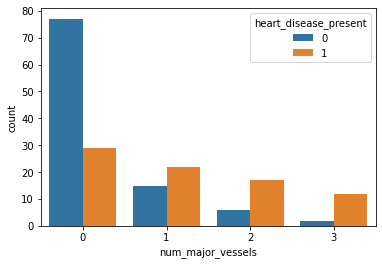

In [98]:
sns.countplot(data=heart_data,x='num_major_vessels',hue='heart_disease_present')

number of major vessels (0-3) colored by flourosopy

<AxesSubplot:xlabel='thal', ylabel='count'>

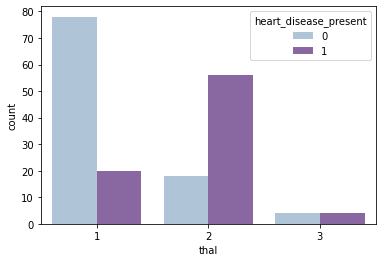

In [106]:
sns.countplot(data = heart_data, x='thal', hue='heart_disease_present', palette='BuPu')

thal: results of thallium stress test measuring blood flow to the heart, with possible values normal, fixed_defect, reversible_defect whoever has the thal  value=2 they have more chances of getting heart_disease

<AxesSubplot:xlabel='thal', ylabel='count'>

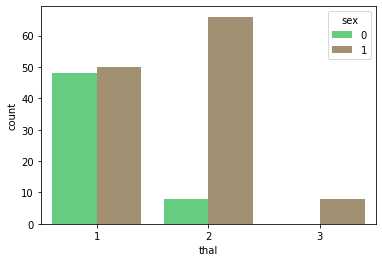

In [107]:
sns.countplot(data=heart_data,x='thal',hue='sex',palette='terrain')

From Above countplot we can clearly observe the males have more thal values with respect to 2 value

In [108]:
# chest_pain_type : chest pain type (4 values)
heart_data['chest_pain_type'].value_counts()

4    82
3    57
2    28
1    13
Name: chest_pain_type, dtype: int64

<AxesSubplot:xlabel='chest_pain_type', ylabel='count'>

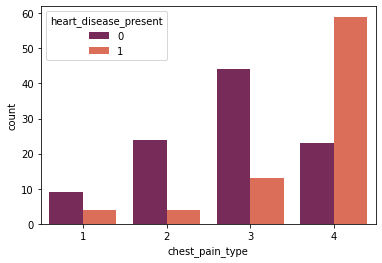

In [109]:
sns.countplot(data=heart_data, x='chest_pain_type', hue='heart_disease_present',palette='rocket')

From the above count plot, if the person (male/female) has chest_pain_value of 4 he/she might be at risk for heart disease.

<AxesSubplot:xlabel='chest_pain_type', ylabel='count'>

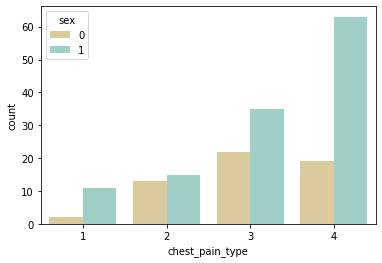

In [111]:
sns.countplot(data=heart_data,x='chest_pain_type',hue='sex',palette='BrBG')

<AxesSubplot:xlabel='sex', ylabel='serum_cholesterol_mg_per_dl'>

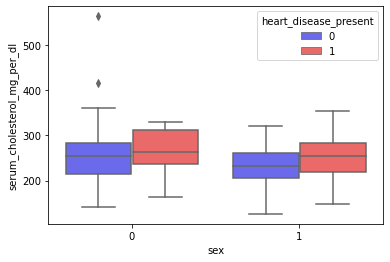

In [112]:
sns.boxplot(data=heart_data,x='sex',y='serum_cholesterol_mg_per_dl',hue='heart_disease_present',palette='seismic')

we observe the outliers with the help of boxplot. Outliers are values that are very small or large in given dataset

<AxesSubplot:xlabel='sex', ylabel='serum_cholesterol_mg_per_dl'>

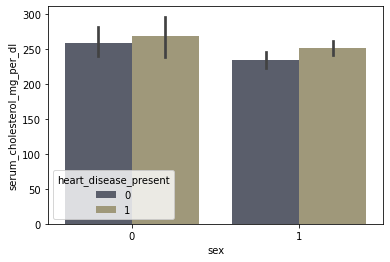

In [114]:
sns.barplot(data=heart_data, x='sex',y='serum_cholesterol_mg_per_dl',hue='heart_disease_present',palette='cividis')

<AxesSubplot:xlabel='sex', ylabel='thal'>

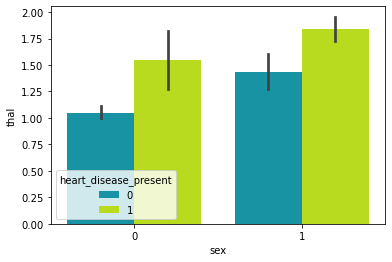

In [115]:
sns.barplot(data=heart_data,x='sex',y='thal',hue='heart_disease_present',palette='nipy_spectral')

<AxesSubplot:xlabel='heart_disease_present', ylabel='num_major_vessels'>

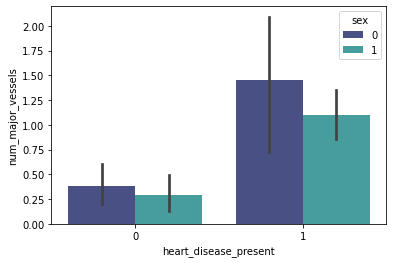

In [116]:
sns.barplot(data=heart_data,x='heart_disease_present',y='num_major_vessels',hue='sex',palette='mako')

<AxesSubplot:xlabel='sex', ylabel='oldpeak_eq_st_depression'>

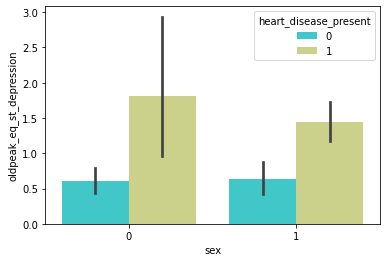

In [117]:
sns.barplot(data=heart_data,x='sex',y='oldpeak_eq_st_depression',hue='heart_disease_present',palette='rainbow')
#oldpeak = ST depression induced by exercise relative to rest
#a measure of abnormality in electrocardiograms

Old peak indicating depression which is induced by excercise relative to rest. Rest is important excercise woud not help your heart_disease
Above barplot shows that if we are not resting well prone to have heart_disease despite of having excercise

### fbs(fasting blood sugar >120mg\dl)(1=true,0=false)and chest_pain relation

In [118]:
heart_data['fasting_blood_sugar_gt_120_mg_per_dl'].value_counts()

0    151
1     29
Name: fasting_blood_sugar_gt_120_mg_per_dl, dtype: int64

<AxesSubplot:xlabel='fasting_blood_sugar_gt_120_mg_per_dl', ylabel='chest_pain_type'>

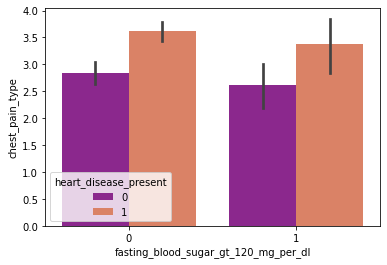

In [121]:
sns.barplot(data=heart_data,x='fasting_blood_sugar_gt_120_mg_per_dl',y='chest_pain_type',hue='heart_disease_present',palette='plasma')

<AxesSubplot:xlabel='sex', ylabel='heart_disease_present'>

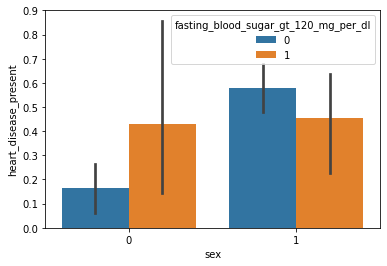

In [122]:
sns.barplot(data=heart_data,x='sex',y='heart_disease_present',hue='fasting_blood_sugar_gt_120_mg_per_dl')

### Cross Tables
#### Sex Vs heart_disease

In [125]:
#sex--> M=1,F=0 we can observe females having heart_disease =11,not having=45
#when it comes to males having =69,not having=55
gen = pd.crosstab(heart_data['sex'],heart_data['heart_disease_present'])
print(gen)

heart_disease_present   0   1
sex                          
0                      45  11
1                      55  69


### PLOT

<AxesSubplot:xlabel='sex'>

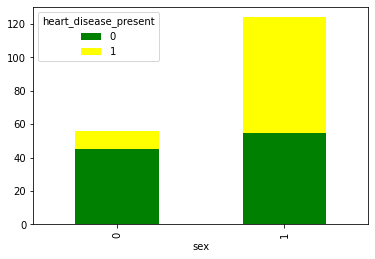

In [126]:
gen.plot(kind='bar',stacked=True,color=['green','yellow'],grid=False)

In [133]:
temp = pd.crosstab(index=heart_data['sex'],columns=heart_data['thal'],margins=True)
temp

thal,1,2,3,All
sex,,,,
0,48,8,0,56
1,50,66,8,124
All,98,74,8,180


<AxesSubplot:xlabel='sex'>

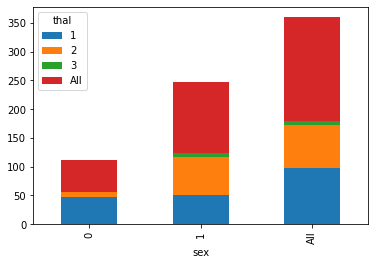

In [134]:
temp.plot(kind='bar',stacked=True)

In [136]:
temp1 = pd.crosstab(index=heart_data['heart_disease_present'],columns=heart_data['thal'],margins=True)
temp1

thal,1,2,3,All
heart_disease_present,,,,
0,78,18,4,100
1,20,56,4,80
All,98,74,8,180


<AxesSubplot:xlabel='heart_disease_present'>

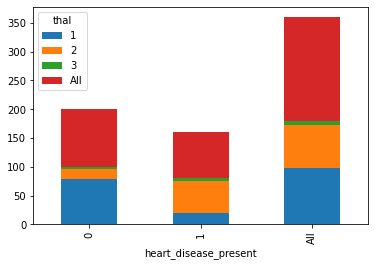

In [137]:
temp1.plot(kind='bar',stacked=True)

In [139]:
chest_pain = pd.crosstab(index=heart_data['chest_pain_type'],columns=heart_data['heart_disease_present'])
chest_pain

heart_disease_present,0,1
chest_pain_type,,
1,9,4
2,24,4
3,44,13
4,23,59


<AxesSubplot:xlabel='chest_pain_type'>

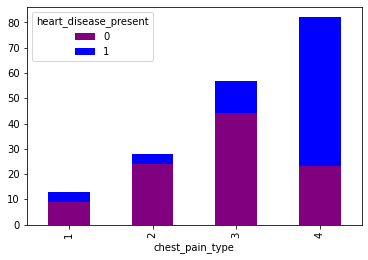

In [145]:
chest_pain.plot(kind='bar',stacked=True,color=['purple','blue'],grid=False)

In [31]:
heart_data.columns

Index(['heart_disease_present', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina'],
      dtype='object')

In [32]:
heart_data.head()

,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0,1,1,128,2,0,0,2,308,0.0,1,45,170,0
1,0,2,1,110,3,0,0,0,214,1.6,0,54,158,0
2,1,1,1,125,4,3,0,2,304,0.0,1,77,162,1
3,1,1,2,152,4,0,0,0,223,0.0,1,40,181,0
4,0,3,2,178,1,0,0,2,270,4.2,1,59,145,0


#### FEATURE SCALING
Feature scaling is a method used to normalize the range of independent variables or features of data In data processing, it is also known as data normalization and is generally performed during the data preprocessing step

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
standardscaler = StandardScaler()
columns_to_scale = ['chest_pain_type','oldpeak_eq_st_depression','resting_blood_pressure','serum_cholesterol_mg_per_dl','age','max_heart_rate_achieved']
heart_data[columns_to_scale ]=standardscaler.fit_transform(heart_data[columns_to_scale ])

In [35]:
heart_data

,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0,1,1,-0.195195,-1.234775,0,0,2,1.118269,-0.903207,1,-1.053964,0.932485,0
1,0,2,1,-1.256320,-0.166220,0,0,0,-0.669778,0.527616,0,-0.087134,0.387084,0
2,1,1,1,-0.372049,0.902335,3,0,2,1.042182,-0.903207,1,2.383654,0.568884,1
3,1,1,2,1.219639,0.902335,0,0,0,-0.498582,-0.903207,1,-1.591092,1.432436,0
4,0,3,2,2.752375,-2.303330,0,0,2,0.395442,2.852703,1,0.449994,-0.203768,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1,2,2,-0.372049,0.902335,2,1,0,0.091093,-0.724354,1,1.309398,0.614334,0
176,1,2,1,2.870278,0.902335,0,0,1,1.479683,2.137292,0,0.020291,-1.476372,1
177,1,2,2,-0.372049,-0.166220,0,0,0,1.137291,0.706469,1,0.987122,-0.840070,1
178,0,1,1,-0.431000,-0.166220,2,1,0,0.110115,-0.903207,1,-0.731688,1.159736,0


In [37]:
X=heart_data.drop(['heart_disease_present'],axis=1)
y = heart_data['heart_disease_present']

In [38]:
X

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,1,1,-0.195195,-1.234775,0,0,2,1.118269,-0.903207,1,-1.053964,0.932485,0
1,2,1,-1.256320,-0.166220,0,0,0,-0.669778,0.527616,0,-0.087134,0.387084,0
2,1,1,-0.372049,0.902335,3,0,2,1.042182,-0.903207,1,2.383654,0.568884,1
3,1,2,1.219639,0.902335,0,0,0,-0.498582,-0.903207,1,-1.591092,1.432436,0
4,3,2,2.752375,-2.303330,0,0,2,0.395442,2.852703,1,0.449994,-0.203768,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,2,-0.372049,0.902335,2,1,0,0.091093,-0.724354,1,1.309398,0.614334,0
176,2,1,2.870278,0.902335,0,0,1,1.479683,2.137292,0,0.020291,-1.476372,1
177,2,2,-0.372049,-0.166220,0,0,0,1.137291,0.706469,1,0.987122,-0.840070,1
178,1,1,-0.431000,-0.166220,2,1,0,0.110115,-0.903207,1,-0.731688,1.159736,0


In [39]:
y

0      0
1      0
2      1
3      1
4      0
      ..
175    1
176    1
177    1
178    0
179    0
Name: heart_disease_present, Length: 180, dtype: int64

In [71]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=40,stratify=y)

### Check Sample Size

In [72]:
print('X_test_size',X_train.size)
print('X_test_size',X_test.size)
print('y_train',y_train.size)
print("y_test",y_test.size)

X_test_size 1872
X_test_size 468
y_train 144
y_test 36


In [73]:
print(X.shape,X_train.shape,X_test.shape)

(180, 13) (144, 13) (36, 13)


### Model Training
Model training in machine language is the process of feeding ML algorithm with data to help identify and learn good values for all attributes involved. There are several types of machine learning models, of which the most common ones are supervised and unsupervised learning

### LogisticRegression
Logistic regression is a statistical analysis method to predict a binary outcome, such as yes or no,0 or 1,True or False based on prior observations of a data set. A logistic regression model predicts a dependent data variable by analyzing the relationship between one or more existing independent variables.

In [74]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model1 = lr.fit(X_train,y_train)
prediction1 = model1.predict(X_test)

In [75]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,prediction1)
cm

array([[17,  3],
       [ 2, 14]], dtype=int64)

<AxesSubplot:>

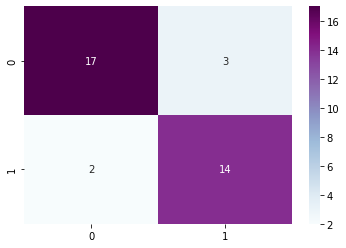

In [76]:
#plot heatmap
sns.heatmap(cm,annot=True,cmap='BuPu')

In [77]:
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

In [78]:
print("Testing Accuracy",(TP+TN)/(TP+TN+FP+FN))

Testing Accuracy 0.8611111111111112


In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction1)

0.8611111111111112

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction1))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        20
           1       0.82      0.88      0.85        16

    accuracy                           0.86        36
   macro avg       0.86      0.86      0.86        36
weighted avg       0.86      0.86      0.86        36



### Decision Tree


In [81]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
model2 = dtc.fit(X_train,y_train)
prediction2 = model2.predict(X_test)
cm2 = confusion_matrix(y_test,prediction2)
cm2

array([[16,  4],
       [ 4, 12]], dtype=int64)

<AxesSubplot:>

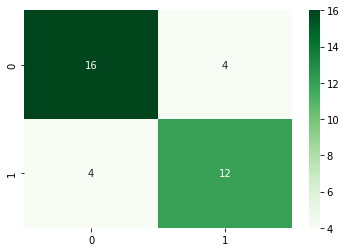

In [82]:
sns.heatmap(cm2,annot=True,cmap='Greens')

#plot_color_gradients('Sequential',
#['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
# 'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
# 'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'])

In [83]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction2)

0.7777777777777778

In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction2))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        20
           1       0.75      0.75      0.75        16

    accuracy                           0.78        36
   macro avg       0.78      0.78      0.78        36
weighted avg       0.78      0.78      0.78        36



## Random Forest

In [85]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
model3 = rfc.fit(X_train,y_train)
prediction3 = model3.predict(X_test)
cm3 = confusion_matrix(y_test,prediction3)
cm3

array([[18,  2],
       [ 2, 14]], dtype=int64)

<AxesSubplot:>

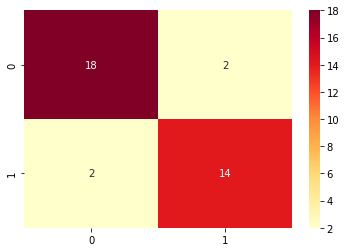

In [86]:
sns.heatmap(cm3,annot=True,cmap='YlOrRd')

In [87]:
print("Test Accuracy:",(TP+TN)/(TP+TN+FP+FN))

Test Accuracy: 0.8611111111111112


In [88]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction3)

0.8888888888888888

In [89]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction3))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        20
           1       0.88      0.88      0.88        16

    accuracy                           0.89        36
   macro avg       0.89      0.89      0.89        36
weighted avg       0.89      0.89      0.89        36



### Support Vector Machine

In [90]:
from sklearn.svm import SVC

In [91]:
svc= SVC()
model4 = svc.fit(X_train,y_train)
prediction4 = model4.predict(X_test)
cm4 = confusion_matrix(y_test,prediction4)
cm4

array([[18,  2],
       [ 3, 13]], dtype=int64)

<AxesSubplot:>

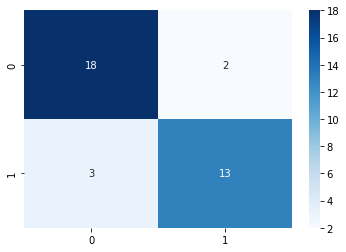

In [92]:
sns.heatmap(cm4,annot=True,cmap='Blues')

In [93]:
print("Test accuracy:",(TP+TN)/(TP+TN+FP+FN))

Test accuracy: 0.8611111111111112


In [94]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction4)

0.8611111111111112

In [95]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction4))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        20
           1       0.87      0.81      0.84        16

    accuracy                           0.86        36
   macro avg       0.86      0.86      0.86        36
weighted avg       0.86      0.86      0.86        36



### Naive Bayes classifier

In [96]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
model5 = NB.fit(X_train,y_train)
prediction5 = model5.predict(X_test)
cm5  = confusion_matrix(y_test,prediction5)
cm5

array([[18,  2],
       [ 1, 15]], dtype=int64)

<AxesSubplot:>

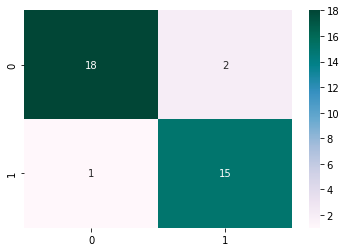

In [97]:
sns.heatmap(cm5,annot=True,cmap='PuBuGn')

In [98]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction5)

0.9166666666666666

In [99]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction5))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92        20
           1       0.88      0.94      0.91        16

    accuracy                           0.92        36
   macro avg       0.91      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36



### K-Nearest Neighbors Algorithm

In [100]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
model6 = KNN.fit(X_train,y_train)
prediction6 = model6.predict(X_test)
cm6 = confusion_matrix(y_test,prediction6)
cm6

array([[17,  3],
       [ 3, 13]], dtype=int64)

<AxesSubplot:>

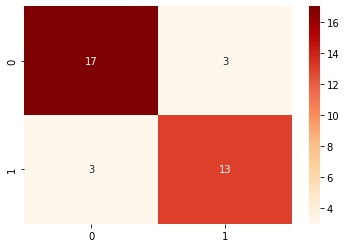

In [101]:
sns.heatmap(cm6,annot=True,cmap='OrRd')

In [102]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction6)

0.8333333333333334

In [103]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction6))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        20
           1       0.81      0.81      0.81        16

    accuracy                           0.83        36
   macro avg       0.83      0.83      0.83        36
weighted avg       0.83      0.83      0.83        36



In [104]:
print('KNN :', accuracy_score(y_test, prediction6))
print('lr :', accuracy_score(y_test, prediction1))
print('dtc :', accuracy_score(y_test, prediction2))
print('rfc :', accuracy_score(y_test, prediction3))
print('NB: ', accuracy_score(y_test, prediction4))
print('SVC :', accuracy_score(y_test, prediction5))

KNN : 0.8333333333333334
lr : 0.8611111111111112
dtc : 0.7777777777777778
rfc : 0.8888888888888888
NB:  0.8611111111111112
SVC : 0.9166666666666666


### Create DataFrame

In [107]:
import pandas as pd
# assign data of lists.
data = {'Model': ['KNN', 'lr', 'dtc', 'rfc','NB','SVC'], 'Accuracy_score':[0.83, 0.86, 0.77,0.88,0.86,0.91]}
# Create DataFrame.
df = pd.DataFrame(data)
# Print the output.
df

,Model,Accuracy_score
0,KNN,0.83
1,lr,0.86
2,dtc,0.77
3,rfc,0.88
4,NB,0.86
5,SVC,0.91


### Model Evaluation

### Building A Predictive System

In [123]:
input_data = (1,1,128,2,0,0,2,308,0.0,1,45,170,0)#healthy person
#change the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

In [124]:
#REshape the numpy array as we are predicting for one instant
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

In [125]:
Prediction = model5.predict(input_data_reshape)

In [126]:
print(Prediction)


[0]


In [127]:
if(Prediction[0]==0):
    print('The Person Does Not Have a Heart Disease')
else:
    print("The Person Has Heart Disease")

The Person Does Not Have a Heart Disease


In [128]:
#check for another 
input_data1 = (3,2,170,4,0,0,2,326,3.4,1,59,140,1)#person has heart disease
input_data1_as_numpy_array = np.asarray(input_data1)
reshape_ = input_data1_as_numpy_array.reshape(1,-1)

In [129]:
Prediction2 = model5.predict(reshape_)
if(Prediction2[0]==0):
    print('The Person Does Not Have a Heart Disease')
else:
    print("The Person Has Heart Disease")

The Person Does Not Have a Heart Disease
